In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import xlrd
import matplotlib as mlt

In [2]:
#get & set working directory
os.getcwd()

'/home/sa05975666/06-08-2018'

In [3]:
# read the data files
df = pd.read_excel("/home/sa05975666/06-08-2018/Q1_birthRates_data.xlsx")

In [4]:
# find out what's there in data set
print(df.shape)
df.describe()

(15547, 5)


,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [5]:
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [6]:
df.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [7]:
nan_rows = df[df.isnull().T.any().T]

In [8]:
df.dtypes

year        int64
month       int64
day       float64
gender     object
births      int64
dtype: object

In [9]:
df.day.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 99., nan])

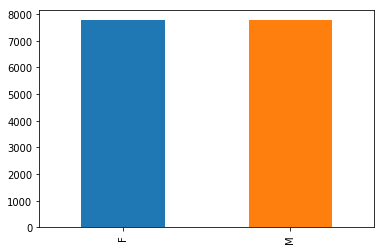

In [10]:
#value counts of no.of male and female rows
df['gender'].value_counts().plot.bar()

## The birth rate has drastically increased after few year

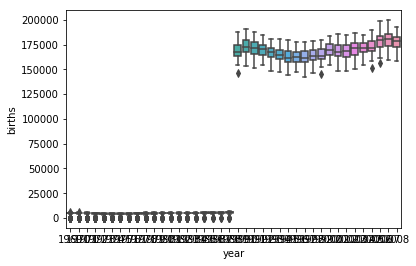

In [11]:
sns.boxplot( x='year', y='births', data = df)

## birth rate increased starting from 1988

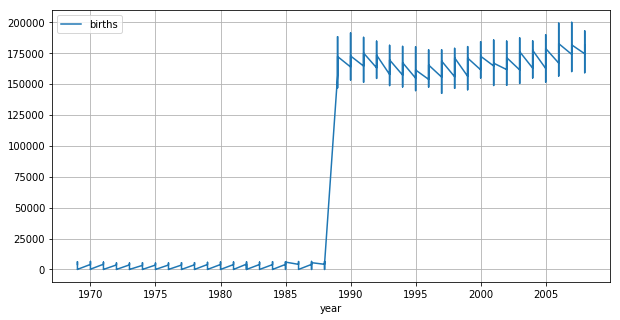

In [12]:

df[['births', 'year']].set_index('year').plot(figsize=(10,5), grid=True)

## birth rate by months -  more births took place 
## during the 8th month(August)
## and least births in 2nd month(Feb)

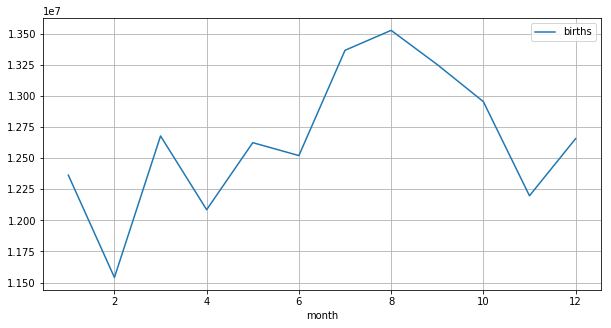

In [13]:
df.groupby(['month'], as_index = True)[['births']].sum().plot(figsize=(10,5), 
                                                              grid=True)

## no.of male births were slightly more 

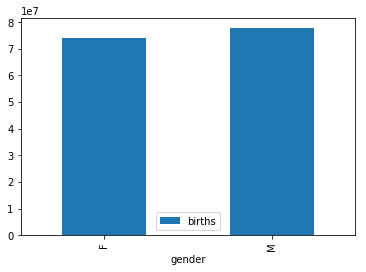

In [14]:
df.groupby(['gender'], as_index = True)[['births']].sum().plot.bar()

## grouping by year - 2007 has high no.of births and
## low births in 1973

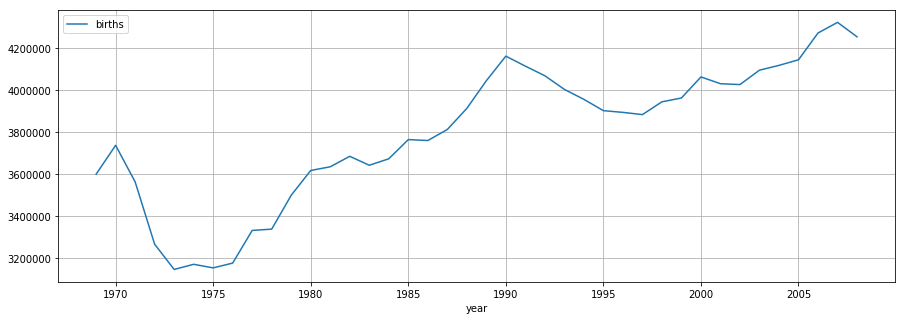

In [15]:
df.groupby(['year'], as_index = True)[['births']].sum().plot(figsize=(15,5), 
                                                             grid=True)

In [16]:
#cleaning null values for visualization
df1 = df.dropna()

In [17]:
#df1['year'] = df1['year'].astype(str)
#df1['month'] = df1['month'].astype(str)
df1['day'] = df1['day'].astype(int)

/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
#separating the df with invalid dates
#df2 = df1[df1.day != 99]

In [19]:
#adding new column - date & resetting the index
df1['date'] = ''
df1 = df1.reset_index(drop = True)

/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
# converting into strings
df1 = df1.astype(str)

In [21]:
# assinging date
for i in range(0,len(df1)):
    df1['date'][i] = str(df1['year'][i]) + '-' + str(df1['month'][i] + '-' + 
                                                     str(df1['day'][i]))

In [22]:
# changing the data back to int
df1['births'] = df1['births'].astype(int)

In [23]:
#separting male and female births for visualization
df_male = df1[df1.gender == 'M']
df_female = df1[df1.gender == 'F']

In [24]:
df_male.head()

,year,month,day,gender,births,date
1,1969,1,1,M,4440,1969-1-1
3,1969,1,2,M,4548,1969-1-2
5,1969,1,3,M,4994,1969-1-3
7,1969,1,4,M,4520,1969-1-4
9,1969,1,5,M,4198,1969-1-5


In [25]:
print(df_male.shape)
print(df_female.shape)

(7531, 6)
(7536, 6)


In [26]:
data = pd.DataFrame()
data['date'] = df_male['date']

Text(0,0.5,'Male Births')

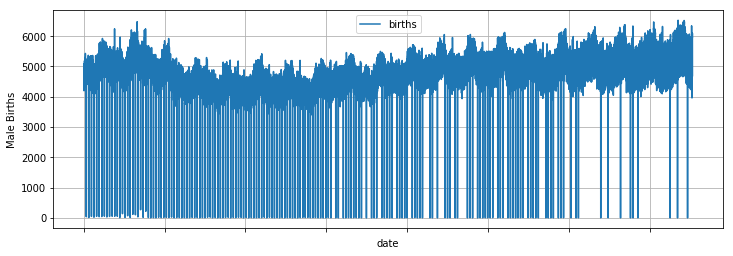

In [27]:
#birth of males as per date
mx = df_male[['births', 'date']].set_index('date').plot(figsize=(12,4), 
                                                        grid=True)
mx.set_ylabel('Male Births')

Text(0,0.5,'female Births')

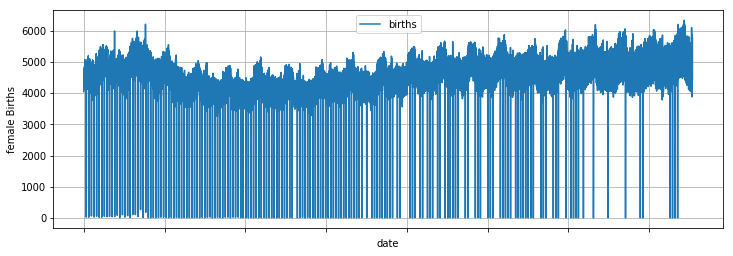

In [28]:
#birth of females as per date
fx = df_female[['births', 'date']].set_index('date').plot(figsize=(12,4), 
                                                          grid=True)
fx.set_ylabel('female Births')

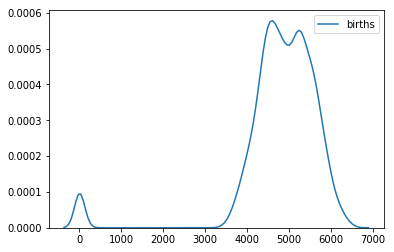

In [29]:
#kde plot to know the distrubution of males
sns.kdeplot(df_male.births)

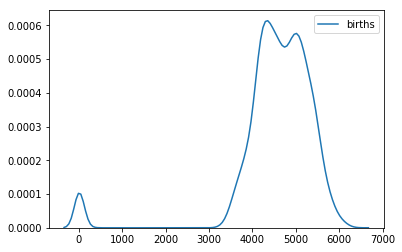

In [30]:
sns.kdeplot(df_female.births)

In [31]:
total_male_births =  df_male.births.sum()
total_male_births

36139593

In [32]:
total_female_births =  df_female.births.sum()
total_female_births

34353348